**Universidad Galileo**

**Ciencia de Datos en Python**

**Nombre: Rodrigo Chang**

# Proyección vectorial

### Que es proyección vectorial?
Es una operación entre dos vectores en la cual se encuentra cómo se ve un vector en la dirección del otro. Si se habla de la proyección del vector b sobre el vector a, entonces utilizamos la notación $\mathrm{proj}_\mathbf{a} \mathbf{b}$, y esto sería encontrar un vector $\mathrm{proj}_\mathbf{a} \mathbf{b}$ que indica cómo se ve el vector $\mathbf{b}$ en la dirección del vector $\mathbf{a}$.

### Definir una ufunc para calcular proyección vectorial sobre vectores de Numpy

La proyección vectorial de $\mathbf{b}$ sobre $\mathbf{a}$ estaría dada por: $$ \mathrm{proj}_\mathbf{a} \mathbf{b} = \left( \frac{\mathbf{a}\cdot\mathbf{b}}{|\mathbf{a}|} \right) \frac{\mathbf{a}}{|\mathbf{a}|} =  \frac{\mathbf{a}\cdot\mathbf{b}}{|\mathbf{a}|^2}\mathbf{a} $$ Note que el primer paréntesis es un escalar, que representa qué tanto es el producto escalar respecto a la magnitud de $\mathbf{a}$ y luego se multiplica por el vector unitario de $\mathbf{a}$.

In [1]:
import numpy as np

In [11]:
def proj(b, a): 
    """
    Esta función devuelve el vector de proyección de b sobre a
    """
    return (np.inner(a, b) / np.inner(a, a))*a

### Como interpretamos la proyección vectorial?
La proyección vectorial se puede interpretar como la "mejor aproximación" del vector b sobre el subespacio en el cual vive el vector a. Puede pensarse que el vector b hace una "sombra" sobre el vector a y que dicha sombra indica cómo se ve el vector b sobre la dirección del vector a.

### Algunos vectores de ejemplo y su interpretación
Supongamos que $\mathbf{b}$ es un vector del espacio $\mathbb{R}^2$, por lo tanto, $\mathbf{b} = (b_1, b_2)$. Supongamos que $\mathbf{a} = (a_1, 0)$ es un vector en el subespacio formado por la recta horizontal $y=0$ en el plano $\mathbb{R}^2$. Así, las proyecciones de $\mathbf{b}$ sobre $\mathbf{a}$ serían exactamente la sombra de $\mathbf{b}$ sobre el eje horizontal del plano cartesiano. Así, esperamos que si $b_2\rightarrow 0$, entonces $\mathrm{proj}_\mathbf{a} \mathbf{b} \approx \mathbf{b}$ sobre el eje $X$, es decir, $\mathrm{proj}_\mathbf{a} \mathbf{b}$ es la mejor representación de $\mathbf{b}$ en el subespacio de $\mathbf{a}$.

In [12]:
# Si b = (1,1) y a = (1, 0)
b = np.array([1,1])
a = np.array([1,0])
print(proj(b,a))

[1. 0.]


Esto devuelve (1, 0), pues prácticamente le quita su componente vertical al vector (1,1). En este ejemplo no importará el valor de $a_1$, la proyección siempre nos dará la componente horizontal del vector $\mathbf{b}$.

In [18]:
a = np.array([0.0000001,0])
proj(b,a)

array([1., 0.])

In [19]:
a = np.array([100000, 0])
proj(b,a)

array([1., 0.])

Si por ejemplo, queremos ver cómo se ve el vector $\mathbf{b}$ sobre la linea de 45 grados que atraviesa el origen del plano cartesiano, haríamos: 

In [20]:
b = np.array([7, 5])
a = np.array([1, 1])
proj(b,a)

array([6., 6.])

Esto representaría que la mejor representación del vector $\mathbf{b}=(7,5)$ en el subespacio formado por el vector $\mathbf{a}= (a_1, a_1)$ es el vector $(6,6)$. 

### Aplicación en ciencia de datos: el algoritmo de Análisis de Componentes Principales

Una aplicación famosa de la proyección vectorial en Ciencia de Datos es el algoritmo de Análisis de Componentes Principales (en inglés, Principal Component Analysis o PCA) que ayuda a reducir la dimensionalidad de un conjunto de datos. Por ejemplo, podría ser complicado correr modelos de regresión y clasificación utilizando 1,000 regresoras, pero con el algoritmo de PCA, esta cantidad de regresoras puede reducirse si utilizamos aquellas que más expliquen a la variable que queremos explicar, posiblemente porque muchas de las regresoras presentan una relación lineal entre sí.

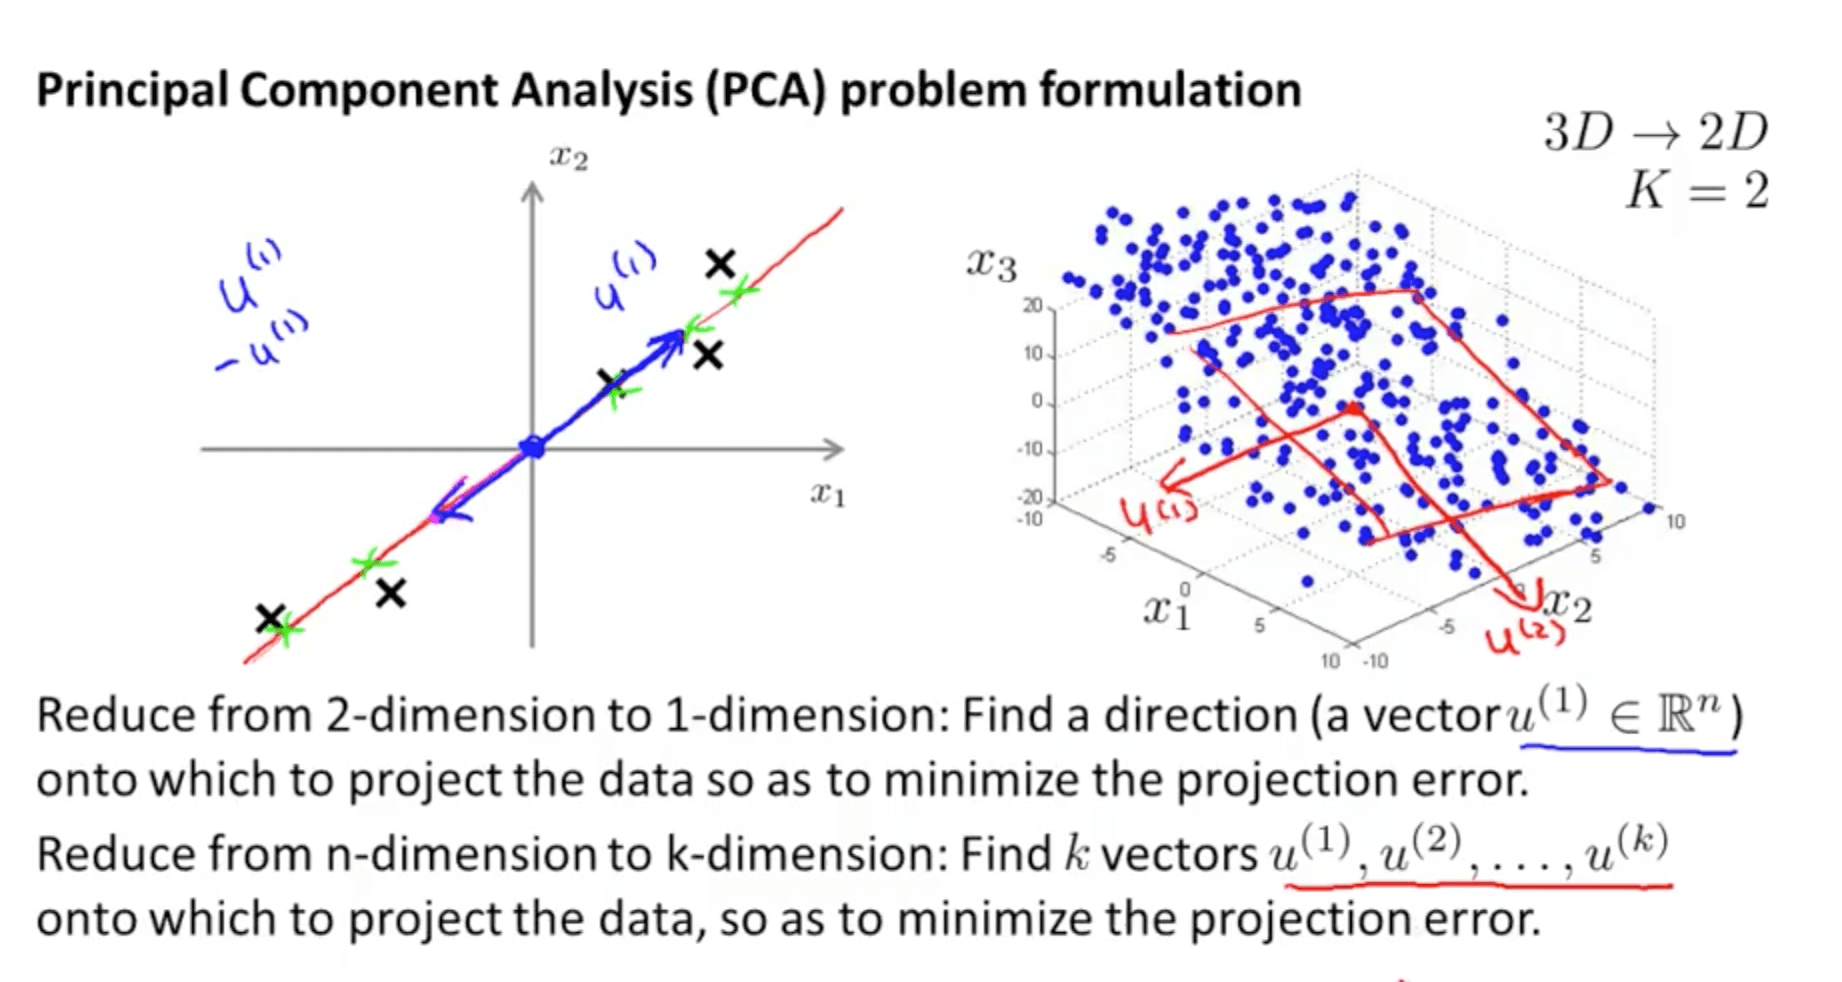

Por ejemplo, en la imagen, el conjunto de puntos de $\mathbb{R}^3$ está muy cerca de un plano, entonces se intenta reducir las 3 coordenadas de cada punto a coordenadas que se especifiquen en términos de los vectores $u^{(1)}$ y $u^{(2)}$